In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/fake-news/train.csv')

In [4]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


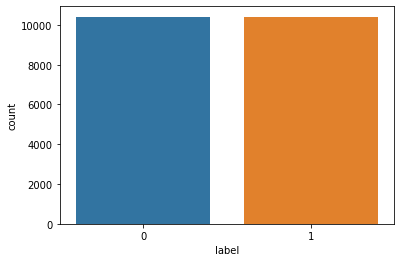

In [5]:
sns.countplot(data = train_df, x = train_df['label'])

In [6]:
train_df.dropna(inplace = True)

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['text'])
X_seq = tokenizer.texts_to_sequences(train_df['text'])
X_pad = pad_sequences(X_seq, maxlen = 500)

In [13]:
vocab_size = len(tokenizer.word_index) + 1

In [15]:
Y = train_df['label']

In [16]:
model = keras.models.Sequential([
        keras.layers.Embedding(vocab_size, 40, input_length = 500),
        keras.layers.LSTM(100),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           8566800   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 8,623,301
Trainable params: 8,623,301
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_pad, Y, validation_split = 0.2, batch_size = 16, epochs = 10)

Epoch 1/10
915/915 [==============================] - 105s 106ms/step - loss: 0.4300 - accuracy: 0.7918 - val_loss: 0.2556 - val_accuracy: 0.8882
Epoch 2/10
915/915 [==============================] - 96s 105ms/step - loss: 0.1795 - accuracy: 0.9302 - val_loss: 0.1956 - val_accuracy: 0.9229
Epoch 3/10
915/915 [==============================] - 95s 104ms/step - loss: 0.0595 - accuracy: 0.9800 - val_loss: 0.1967 - val_accuracy: 0.9289
Epoch 4/10
915/915 [==============================] - 95s 103ms/step - loss: 0.0202 - accuracy: 0.9943 - val_loss: 0.2472 - val_accuracy: 0.9286
Epoch 5/10
915/915 [==============================] - 95s 103ms/step - loss: 0.0261 - accuracy: 0.9908 - val_loss: 0.3245 - val_accuracy: 0.9054
Epoch 6/10
915/915 [==============================] - 95s 104ms/step - loss: 0.0759 - accuracy: 0.9777 - val_loss: 0.2608 - val_accuracy: 0.9212
Epoch 7/10
915/915 [==============================] - 95s 104ms/step - loss: 0.0282 - accuracy: 0.9919 - val_loss: 0.3370 - val_a

In [20]:
model.save('fake_news_detector.hd5')

INFO:tensorflow:Assets written to: fake_news_detector.hd5/assets


INFO:tensorflow:Assets written to: fake_news_detector.hd5/assets
